In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [10]:
print("Rows, columns:", df.shape)
print("Columns:", df.columns.tolist())

Rows, columns: (2443651, 9)
Columns: ['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'category']


In [11]:
print(df[['category','isBestSeller','price','stars']].head())

         category  isBestSeller  price  stars
0  Hi-Fi Speakers         False  21.99    4.7
1  Hi-Fi Speakers          True  23.99    4.7
2  Hi-Fi Speakers         False  21.99    4.7
3  Hi-Fi Speakers         False  31.99    4.7
4  Hi-Fi Speakers         False  17.99    4.6


In [15]:
ct = pd.crosstab(df['category'], df['isBestSeller'])
print(ct)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [19]:
proportion = (ct[True] / ct.sum(axis=1)).sort_values(ascending=False)
proportion


category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Bedding Collections               0.000000
CPUs                              0.000000
CD, Disc & Tape Players           0.000000
Blank Media Cases & Wallets       0.000000
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("p-valor:", p)

if p < 0.05:
    print("Hay una relación significativa entre categoría y best-seller (se rechaza la independencia).")
else:
    print("No hay evidencia de relación (aceptamos independencia).")


Chi-cuadrado: 36540.20270061387
Grados de libertad: 295
p-valor: 0.0
Hay una relación significativa entre categoría y best-seller (se rechaza la independencia).


In [21]:
n = ct.values.sum()
min_dim = min(ct.shape) - 1 
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Cramér’s V:", cramers_v)

Cramér’s V: 0.1222829439760564


Tiene una relación débil.

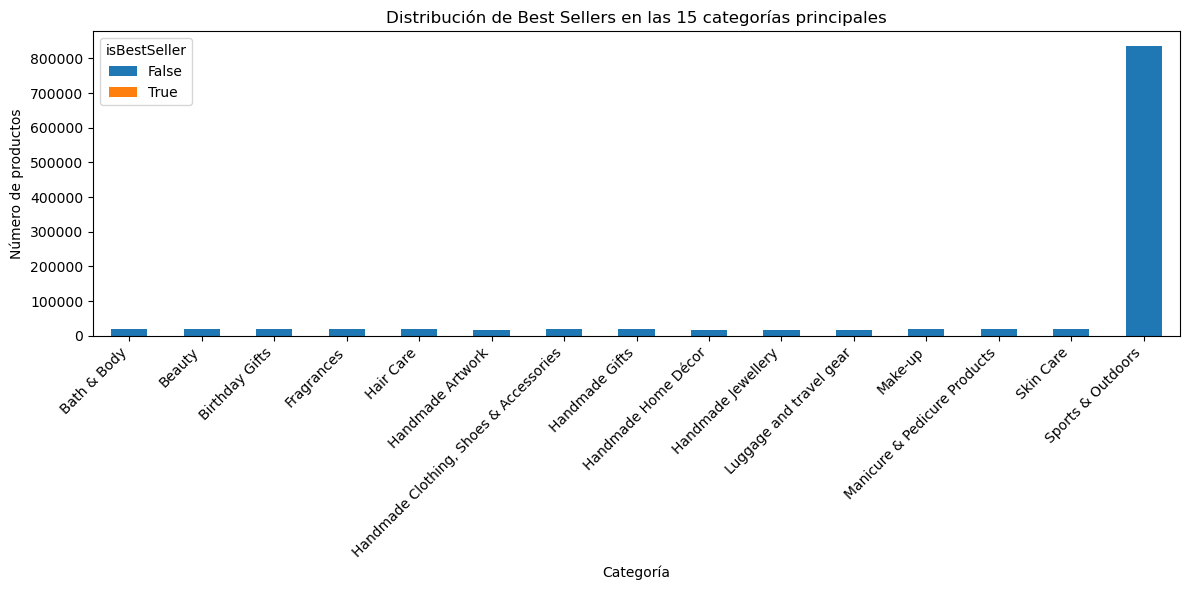

In [26]:
top_categories = df["category"].value_counts().head(15).index


ct_top = pd.crosstab(df[df["category"].isin(top_categories)]["category"],
                     df[df["category"].isin(top_categories)]["isBestSeller"])


ct_top.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Distribución de Best Sellers en las 15 categorías principales")
plt.xlabel("Categoría")
plt.ylabel("Número de productos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [27]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")


Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Límite inferior:", lower_limit)
print("Límite superior:", upper_limit)


df_no_out = df[(df["price"] >= lower_limit) & (df["price"] <= upper_limit)]
print("Filas antes:", len(df), " |  Filas después de eliminar outliers:", len(df_no_out))


Límite inferior: -44.01
Límite superior: 99.99000000000001
Filas antes: 2443651  |  Filas después de eliminar outliers: 2115963


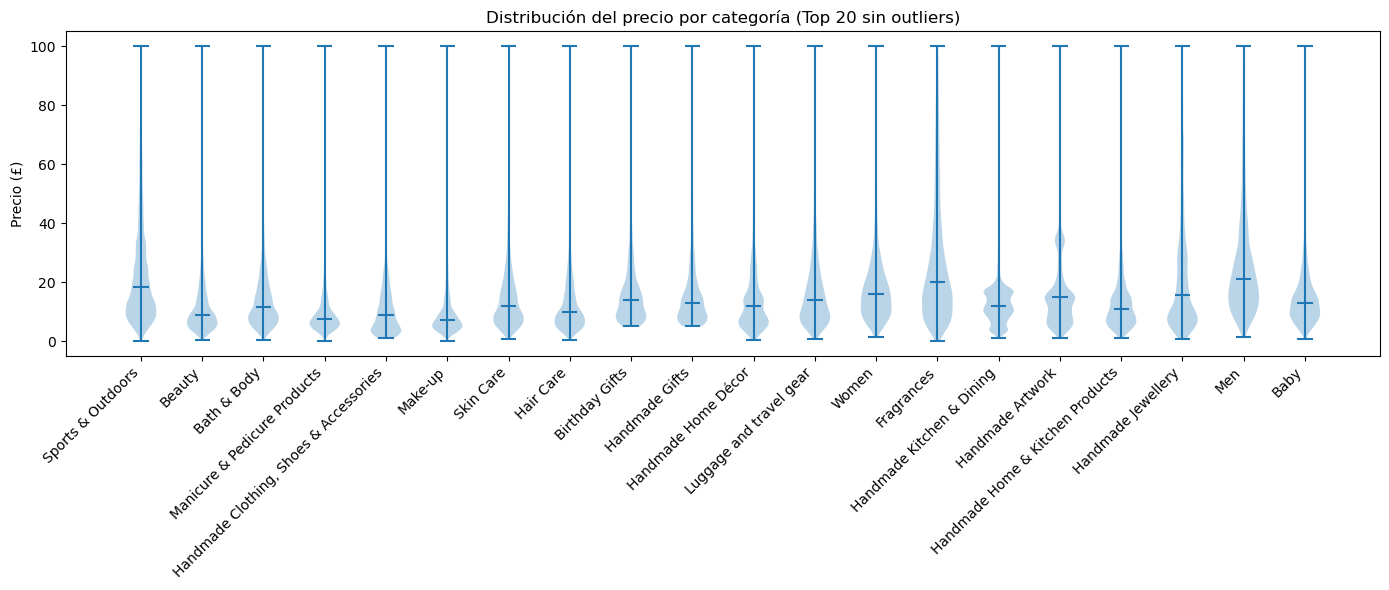

In [34]:
top20 = df_no_out["category"].value_counts().head(20).index

plt.figure(figsize=(14,6))
plt.violinplot([df_no_out[df_no_out["category"] == c]["price"] for c in top20],
               showmeans=False, showmedians=True)
plt.xticks(range(1, len(top20)+1), top20, rotation=45, ha="right")
plt.title("Distribución del precio por categoría (Top 20 sin outliers)")
plt.ylabel("Precio (£)")
plt.tight_layout()
plt.show()


In [32]:
median_price = df.groupby("category")["price"].median().sort_values(ascending=False)
print("Categorías con mayor precio mediano:")
print(median_price.head(10))


Categorías con mayor precio mediano:
category
Laptops                                1042.725
Desktop PCs                             810.400
Snowboards                              366.725
Home Audio Record Players               326.080
3D Printers                             319.000
Motorbike Exhaust & Exhaust Systems     313.830
Graphics Cards                          259.980
Snowboard Boots                         258.990
Lenses                                  249.990
Barebone PCs                            244.990
Name: price, dtype: float64


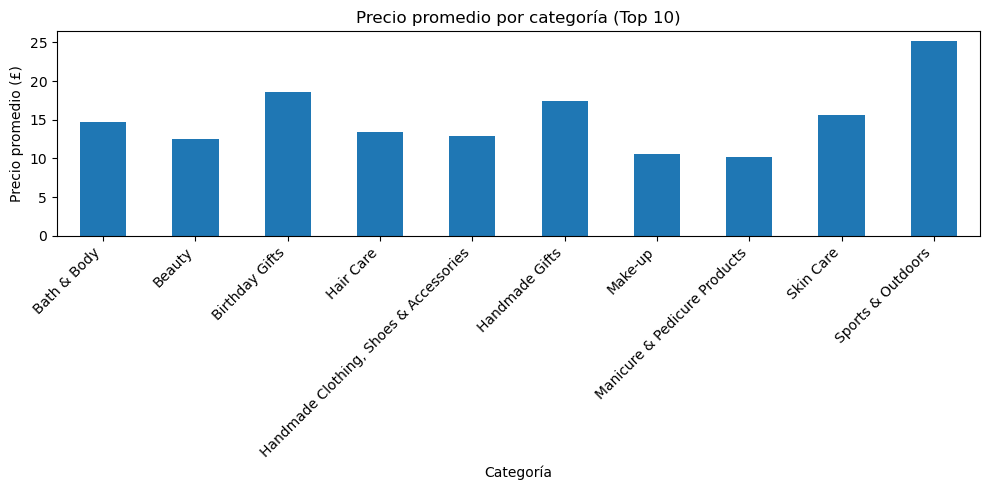

In [35]:
top10 = df_no_out["category"].value_counts().head(10).index

avg_price = df_no_out[df_no_out["category"].isin(top10)].groupby("category")["price"].mean()

avg_price.plot(kind="bar", figsize=(10,5))
plt.title("Precio promedio por categoría (Top 10)")
plt.xlabel("Categoría")
plt.ylabel("Precio promedio (£)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [36]:
avg_price_full = df.groupby("category")["price"].mean().sort_values(ascending=False)
print("Categorías con mayor precio promedio:")
print(avg_price_full.head(10))


Categorías con mayor precio promedio:
category
Laptops                       1087.987827
3D Printers                   1018.036129
Desktop PCs                    926.816064
Home Office Furniture          622.135898
Test & Measurement             559.382973
Home Audio Record Players      529.665585
CPUs                           514.519317
Digital Cameras                496.156185
Material Handling Products     487.191813
Graphics Cards                 444.746827
Name: price, dtype: float64


C:\Users\Javier Soto\AppData\Local\Temp\ipykernel_27848\2359095085.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["category"] == c]["stars"].dropna() for c in top10_ratings],


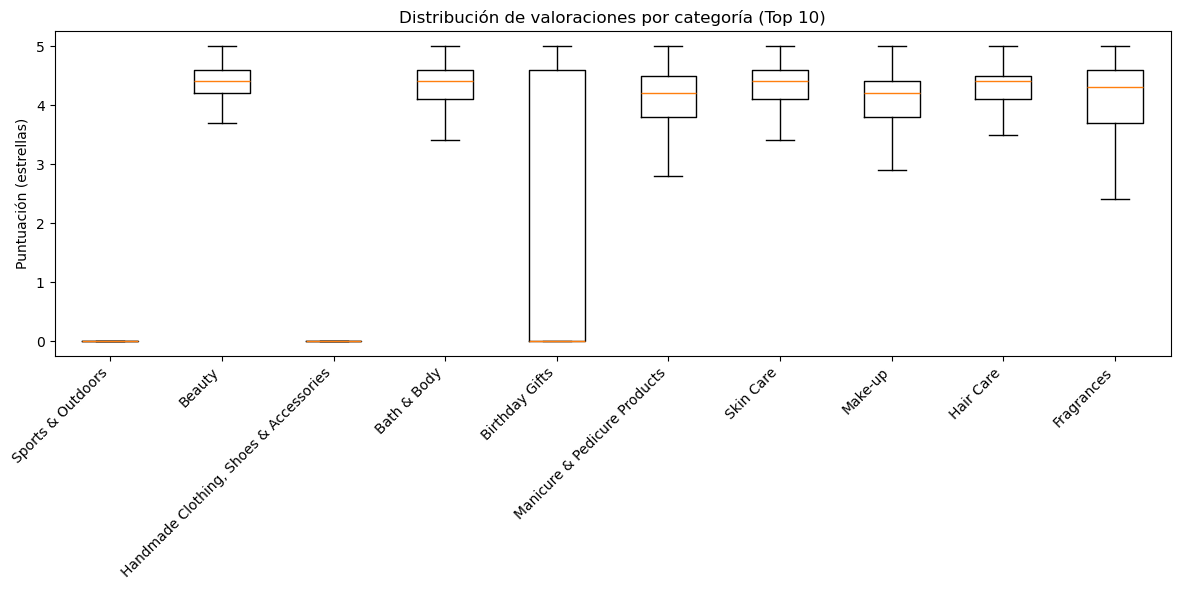

In [37]:
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

top10_ratings = df["category"].value_counts().head(10).index

plt.figure(figsize=(12,6))
plt.boxplot([df[df["category"] == c]["stars"].dropna() for c in top10_ratings],
            labels=top10_ratings, showfliers=False)
plt.title("Distribución de valoraciones por categoría (Top 10)")
plt.ylabel("Puntuación (estrellas)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [38]:
median_rating = df.groupby("category")["stars"].median().sort_values(ascending=False)
print("Categorías con mayor valoración mediana:")
print(median_rating.head(10))


Categorías con mayor valoración mediana:
category
Computer Memory                 4.7
CPUs                            4.6
Building & Construction Toys    4.6
Laptop Accessories              4.6
Hobbies                         4.6
Kids' Play Figures              4.6
Beer, Wine & Spirits            4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Children's Bedding              4.5
Name: stars, dtype: float64


In [40]:
corr_value = df_corr["price"].corr(df_corr["stars"])
print(f"Correlación entre precio y rating: {corr_value:.3f}")


Correlación entre precio y rating: -0.078


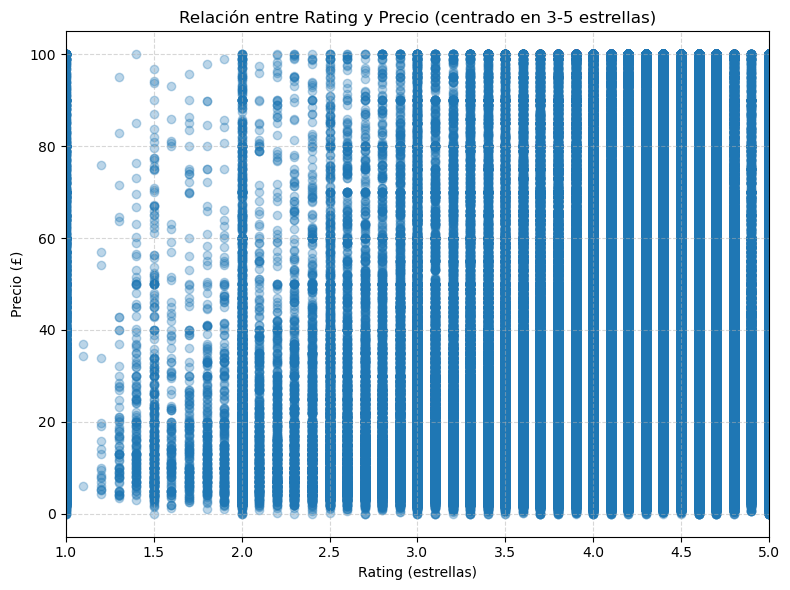

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df_corr["stars"], df_corr["price"], alpha=0.3)
plt.title("Relación entre Rating y Precio (centrado en 3-5 estrellas)")
plt.xlabel("Rating (estrellas)")
plt.ylabel("Precio (£)")
plt.xlim(1,5)  
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Mi correlación de -0.078, que indica una relación muy débil (casi nula) entre precio y rating.
Los productos más caros no necesariamente tienen mejores valoraciones.

In [46]:
df_no_out = df[(df["price"] >= lower_limit) & (df["price"] <= upper_limit)].copy()


In [47]:
df_no_out["price"] = pd.to_numeric(df_no_out["price"], errors="coerce")
df_no_out["stars"] = pd.to_numeric(df_no_out["stars"], errors="coerce")


Columnas numéricas: ['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth']


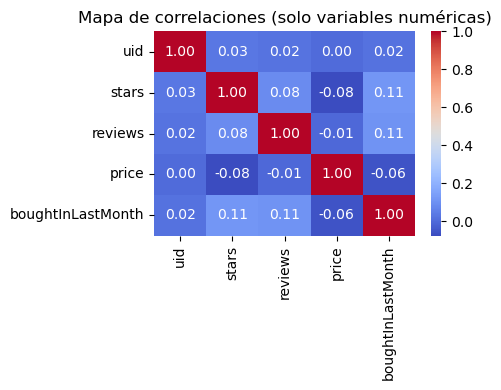

In [49]:

df_num = df_no_out.select_dtypes(include=["number"])


print("Columnas numéricas:", df_num.columns.tolist())


corr_matrix = df_num.corr()


plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones (solo variables numéricas)")
plt.tight_layout()
plt.show()


El precio parece que es una variable independiente del datatset.

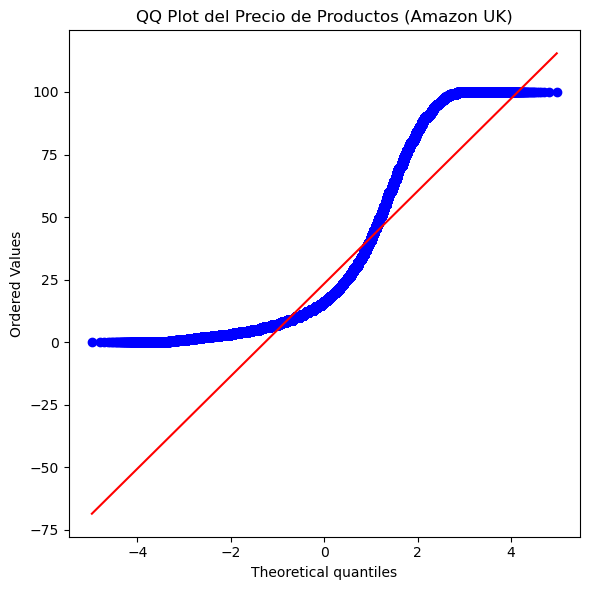

In [51]:
import scipy.stats as stats
df_no_out["price"] = pd.to_numeric(df_no_out["price"], errors="coerce")


plt.figure(figsize=(6,6))
stats.probplot(df_no_out["price"].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot del Precio de Productos (Amazon UK)")
plt.tight_layout()
plt.show()

El precio tiene una distribución asimétrica (sesgada a la derecha).
Esto es habitual en precios de productos online: muchos artículos baratos y unos pocos muy caros